# House prices


## Introdction

Demandez à un acheteur de maison de décrire la maison de ses rêves, et il ne commencera probablement pas par la hauteur du plafond du sous-sol ou la proximité d'un chemin de fer est-ouest. Mais le jeu de données de cette compétition de terrains de jeux prouve que beaucoup plus d'influence sur les négociations de prix que le nombre de chambres ou une clôture blanche.

Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, Iowa, ce concours vous met au défi de prédire le prix final de chaque maison.

## Objectif

Prédir le prix final de chaque logement en fonction des autres variables explicatives
decrivant les aspects des logements résidentiels à Ames, dans l'Iowa.

## Le Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet1/data/sample_submission.csv")
test = pd.read_csv('/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet1/data/test.csv')

## Chargement de données 

In [3]:
# Importation des données
train = pd.read_csv('/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet1/data/train.csv')

# renomons la première colonne "Id"
train = train.rename(columns={train.columns[0]: 'Id'})

# utilisons la variable Id comme index de notre données 
train = train.set_index('Id')

# Affichons des 5 premières lignes de notre jeu de données 
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploitation des données

### Déscription des données 

In [4]:
# Affiche la liste des colonnes de notre données ainsi que leur type respectif
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
# Affiche les variables numériques de notre données 
numerique = train.select_dtypes(include=[np.number])
print('Les variables numériques sont: \n', numerique.columns)

Les variables numériques sont: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [6]:
# Affiche les variables catégorielles de notre données 
categoriel = train.select_dtypes(exclude=[np.number])
print('Les variables numériques sont: \n',categoriel.columns)

Les variables numériques sont: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [7]:
# Affiche la dimension de notre données
print('La dimesion de notre données est', train.shape)

# Affiche des nombres de variable numérique et aussi catégorielles de notre données
print("Nombre de variable numérique est de",sum(np.array(train.dtypes!="object")))
print("Nombre de variable catégorielle est de", sum(np.array(train.dtypes=="object")))

La dimesion de notre données est (1460, 80)
Nombre de variable numérique est de 37
Nombre de variable catégorielle est de 43


__Description des données__ :
* Notre données est comoposés de 81 variables dont :



    - 38 variables numériques : 
    'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
       
    - 43 variables catégoriels : 
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'
       
* La variable 'SalePrice' est notre variable cible qu'on va essayer de prédire, elle est exmprimée en Dollards.


### Distribution statistique des données 

#### Distribution numérique

In [8]:
# distibution numérique 
numerique.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


On peut voir que :
* le prix moyen des logements est de 180921,20 
* le prix minimum est de 34900,00 
* de prix maximal 755000,00 

#### Distribution catégorielle

In [9]:
# Distribution catégorielle 
categoriel.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Présentation statistique de notre variable cible: 

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

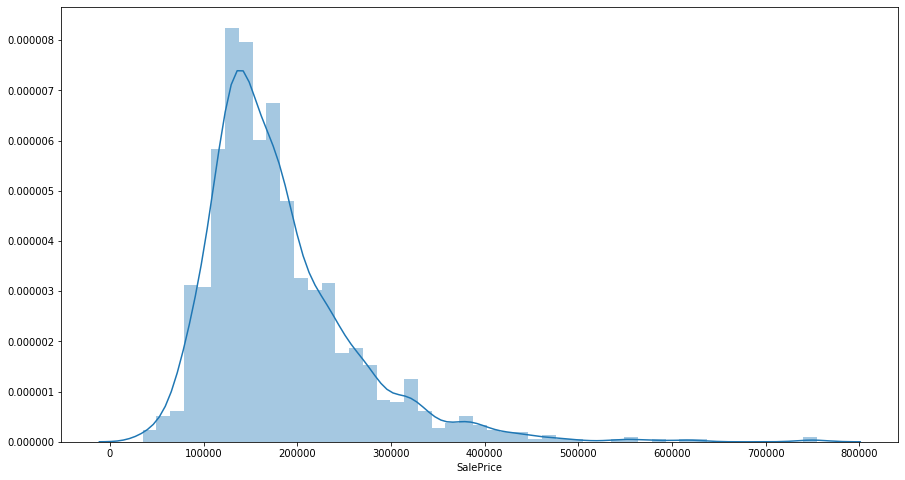

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(train["SalePrice"]);

#### Calcul de la moyenne de prix selon le type du logement 

In [12]:
train[['SalePrice', 'SaleType']].groupby(['SaleType'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,SaleType,SalePrice
6,New,274945.418033
2,Con,269600.000000
1,CWD,210600.000000
4,ConLI,200390.000000
8,WD,173401.836622
0,COD,143973.255814
5,ConLw,143700.000000
3,ConLD,138780.888889
7,Oth,119850.000000


#### Calcul de la moyenne de prix selon la qualité des cuisines

In [13]:
train[['SalePrice', 'KitchenQual']].groupby(['KitchenQual'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,KitchenQual,SalePrice
0,Ex,328554.670000
2,Gd,212116.023891
3,TA,139962.511565
1,Fa,105565.205128


#### Calcul de la moyenne de prix selon le type d'habitation

In [14]:
train[['SalePrice', 'BldgType']].groupby(['BldgType'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,BldgType,SalePrice
0,1Fam,185763.807377
4,TwnhsE,181959.342105
3,Twnhs,135911.627907
2,Duplex,133541.076923
1,2fmCon,128432.258065


#### Calcul de la moyenne de prix selon l'annnée de cinstruction du logement 

In [15]:
train[['SalePrice', 'YearBuilt']].groupby(['YearBuilt'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,YearBuilt,SalePrice
111,2010,394432.000000
109,2008,348849.130435
7,1893,325000.000000
6,1892,291250.000000
90,1989,279500.000000
110,2009,269220.000000
96,1995,262194.444444
97,1996,259162.666667
108,2007,255362.734694
107,2006,251775.447761


#### Calcul de la moyenne de prix selon la qualités des matières utilisé 

In [16]:
train[['SalePrice', 'OverallQual']].groupby(['OverallQual'], as_index=False).mean().sort_values(
    by='SalePrice', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


## Corrélation 

### Matrice de corrélation entre les variables

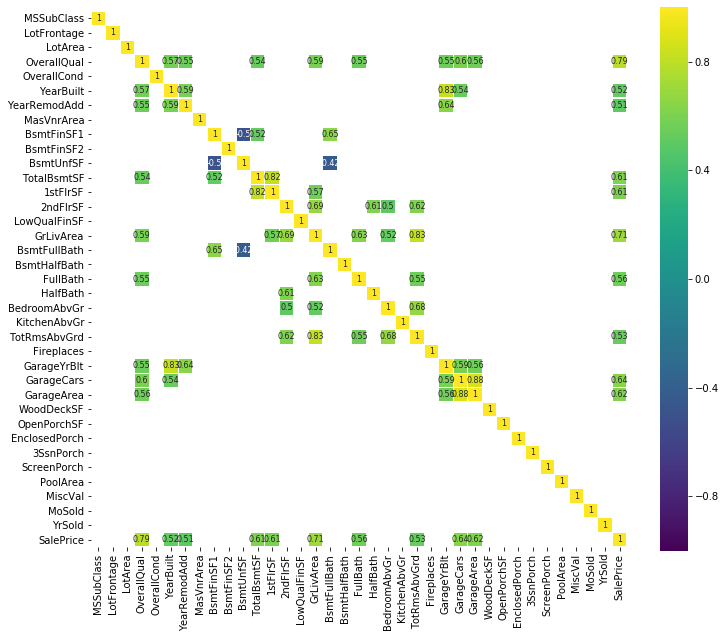

In [17]:
corr = train.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


* une forte corrélation entre 'TotalBsmtFS' et '1stFlrSF' et entre 'GarageYrBlt', 'GarageCars' et 'GarageArea' ce qui signifient que les variables 'TotalBsmtFS' et '1stFlrSF' ainsi que 'GarageYrBlt', 'GarageCars' et 'GarageArea' donnent presque les mêmes informations.


* Il y a aussi une importance de corrélation entre notre variable cible 'SalePrice' et la 'OverallQual' (on va voir un peu plus sur les corrélation entre la variable cible) 

### Corrélation avec la variable cible 'SalePrice'

In [18]:
# Calcul de la corrélation entre la variable cible et les autres variables 
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

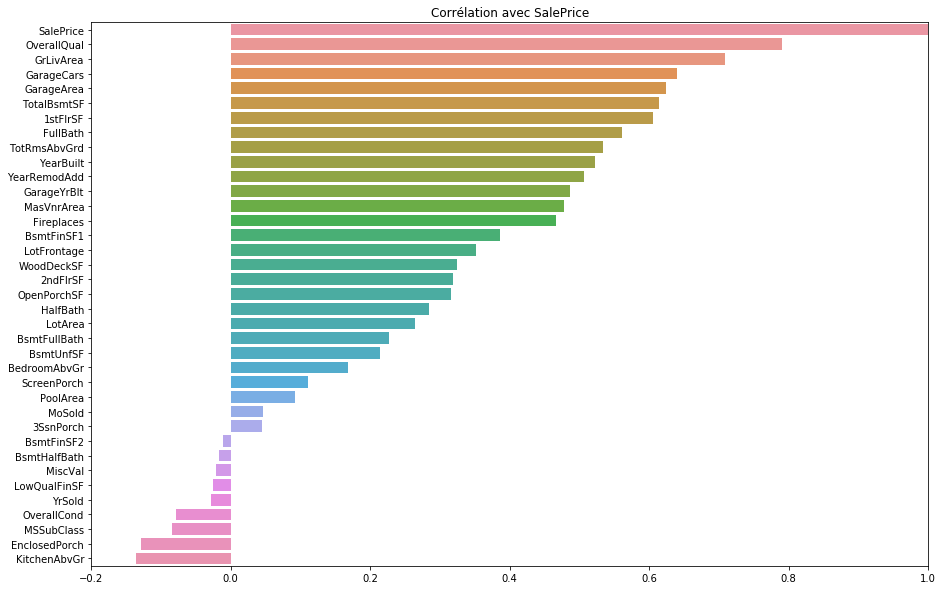

In [20]:
# Affiche de la corrélation entre la variable cible et les autres variables 
data = corr["SalePrice"].sort_values()[::-1]
plt.figure(figsize=(15, 10))
sns.barplot(x=data.values, y=data.index)
plt.title("Corrélation avec SalePrice")
plt.xlim(-0.2, 1)
plt.show()


On constate une forte corrélation entre notre variable cible et : 
* la variable ***'OverallQual'*** : Matière globale et qualité de la finition avec une corrélation = 0.79,
* la variable ***'GrLivArea'*** : Surface habitable au-dessus du sol (sol) pieds carrés avec une corrélation = 0.70,
* la variable ***'GarageCars'*** et aussi la variable ***'GarageArea'*** et vu que les deux variables donnent presque les mêmes information, on peut donc garder qu'une seule. on va garder la variable qui a la corrélation plus élevé. Pareil pour les variables ***'TotalBsmtFS'*** et ***'1stFlrSF'*** on va garder la variables qui a la corrélation plus importante. 



## Nuage de point

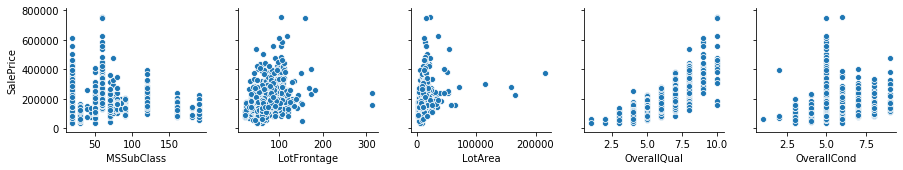

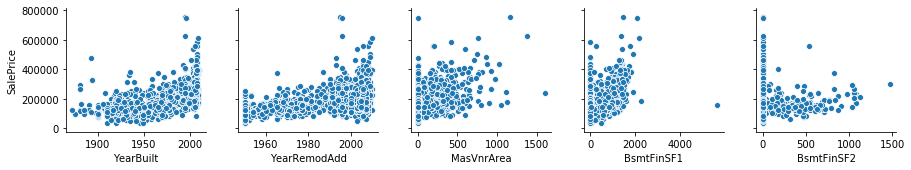

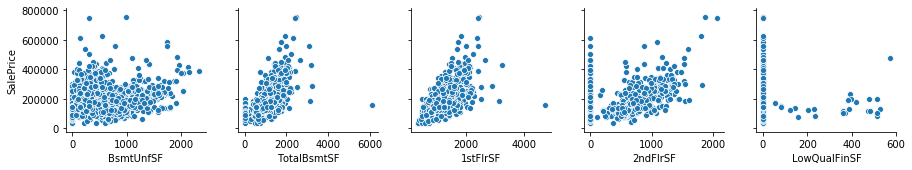

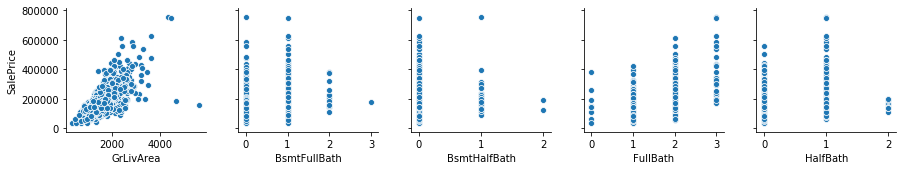

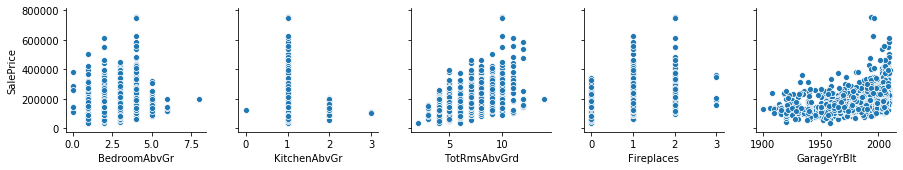

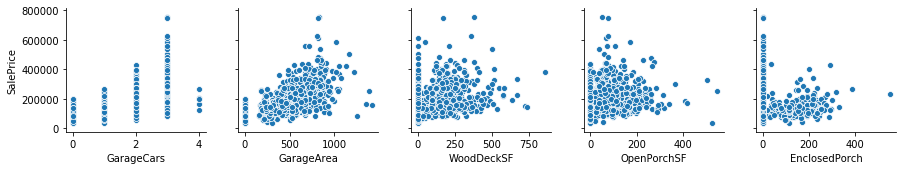

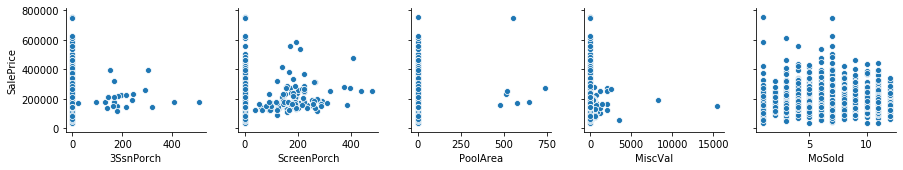

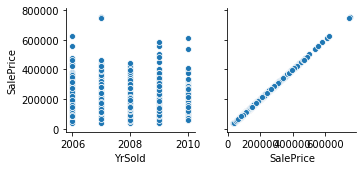

In [21]:
# Affiche les nuage de points entre la variable cible et les variables numériques
for i in range(0, len(numerique.columns), 5):
    sns.pairplot(data=numerique,
                x_vars=numerique.columns[i:i+5],
                y_vars=['SalePrice'])

#### Interpretation

Nous pouvons clairement identifier que les variables ***'TotalBsmtSF'*** , ***'GrLiveArea'*** et ***'1stFlrSF'*** ont une relation linéaire avec la variable ***'SalePrice'***. Ce qui confirme ce qu'on a vu avant.

## Valeurs manquantes

### Détections des valeurs manquantes

In [22]:
# Les valeurs maquantes
train.isnull().any().value_counts()

False    61
True     19
dtype: int64

D'aprés le resultat, il y a 61 variables avec des valeurs maquantes.

In [23]:
# Affichage des nombres et le pourencetage des valeurs maquantes pour chaque variable de notre données 
total = train.isnull().sum().sort_values(ascending=False)
pourcentage = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, pourcentage], axis=1, keys=['Total', 'Pourcentage'])
print('Le nombre et le porcentage des valeurs de chaque variable:\n', 
      missing_data[missing_data['Total'] > 0])


Le nombre et le porcentage des valeurs de chaque variable:
               Total  Pourcentage
PoolQC         1453    99.520548
MiscFeature    1406    96.301370
Alley          1369    93.767123
Fence          1179    80.753425
FireplaceQu     690    47.260274
LotFrontage     259    17.739726
GarageType       81     5.547945
GarageCond       81     5.547945
GarageFinish     81     5.547945
GarageQual       81     5.547945
GarageYrBlt      81     5.547945
BsmtFinType2     38     2.602740
BsmtExposure     38     2.602740
BsmtQual         37     2.534247
BsmtCond         37     2.534247
BsmtFinType1     37     2.534247
MasVnrArea        8     0.547945
MasVnrType        8     0.547945
Electrical        1     0.068493


### Remplacement et suppression des valeurs manquantes

In [ ]:
# Supprimons les colonnes inutiles qui ont le pourcentage plus de 15% 
#train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1)

Maintenant , voyons plus près les autres variables: 
* Les variables garages ont tous 5% de valeurs manquantes, elles sont fortes corrélées entre elles, du coup on va les supprimer et garder une seule ('GarageCars').
* 

In [ ]:
#train = train.drop(['GarageType','GarageCond','GarageFinish','GarageQual','GarageYrBlt'], axis=1)

In [ ]:
#train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])